## Credit Card Fraud Detection

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('Data/creditcard.csv')

In [3]:
# first 5 rows of the dataset
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# last 5 rows of the dataset
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
# dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# check missing values
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
#  distribution of legit transactions & fraudulent transactions
data[data['Class']==1].count()

Time      492
V1        492
V2        492
V3        492
V4        492
V5        492
V6        492
V7        492
V8        492
V9        492
V10       492
V11       492
V12       492
V13       492
V14       492
V15       492
V16       492
V17       492
V18       492
V19       492
V20       492
V21       492
V22       492
V23       492
V24       492
V25       492
V26       492
V27       492
V28       492
Amount    492
Class     492
dtype: int64

In [8]:
data[data['Class']==0].count()

Time      284315
V1        284315
V2        284315
V3        284315
V4        284315
V5        284315
V6        284315
V7        284315
V8        284315
V9        284315
V10       284315
V11       284315
V12       284315
V13       284315
V14       284315
V15       284315
V16       284315
V17       284315
V18       284315
V19       284315
V20       284315
V21       284315
V22       284315
V23       284315
V24       284315
V25       284315
V26       284315
V27       284315
V28       284315
Amount    284315
Class     284315
dtype: int64

In [9]:
# statistical measures of the dataset
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
# distribution of legit transactions & fraudulent transaction
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [11]:
fraud = data[data['Class'] == 1]
legit = data[data['Class'] == 0]
fraud_count = fraud.shape[0]
legit_count = legit.shape[0]

print(f"Total fraud = {fraud_count}")
print(f"Total legit = {legit_count}")


Total fraud = 492
Total legit = 284315


In [12]:
# separating the data for analysis
legit = data[data['Class'] == 0]
fraud = data[data['Class'] == 1]

In [13]:
print(f"Legit = {legit}")

Legit =             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... 

In [14]:
print(f"Fraud = {fraud}")

Fraud =             Time        V1        V2        V3        V4        V5        V6  \
541        406.0 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
623        472.0 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
4920      4462.0 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788   
6108      6986.0 -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536   
6329      7519.0  1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8     

In [15]:
# print shape of legit and fraud
print(f"Shape of Legit = {legit.shape}")
print(f"Shape of Fraud = {fraud.shape}")

Shape of Legit = (284315, 31)
Shape of Fraud = (492, 31)


In [16]:
# statistical measures of legit transaction
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [17]:
# statistical measures of fraudulent transaction
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [18]:
# compare the values for both transactions
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


## Under-Sampling

In [19]:
#Number of Fraudulent Transactions --> 492
#Number of Legit Transactions --> 487
legit_sample = legit.sample(n=492)
fraud_sample =  fraud.sample(n=492)

In [20]:
print(f"Fraud = {fraud_sample}")

Fraud =             Time         V1        V2         V3         V4        V5  \
96341    65728.0   1.227614 -0.668974  -0.271785  -0.589440 -0.604795   
154693  102619.0  -2.488363  4.359019  -7.776410   5.364027 -1.823877   
27362    34521.0   1.081234  0.416414   0.862919   2.520863 -0.005021   
154697  102625.0  -4.221221  2.871121  -5.888716   6.890952 -3.404894   
11343    19762.0 -14.179165  7.421370 -21.405836  11.927512 -7.974281   
...          ...        ...       ...        ...        ...       ...   
30442    35926.0  -3.896583  4.518355  -4.454027   5.547453 -4.121459   
149869   92092.0  -1.108478  3.448953  -6.216972   3.021052 -0.529901   
6472      7740.0   1.023874  2.001485  -4.769752   3.819195 -1.271754   
203700  134928.0   1.204934  3.238070  -6.010324   5.720847  1.548400   
154454  101597.0   0.913116  1.145381  -4.602878   2.091803 -0.473224   

              V6         V7        V8        V9  ...       V21       V22  \
96341  -0.350285  -0.486365 -0.010809 -

In [21]:
print(f"Legit = {legit_sample}")

Legit =             Time        V1        V2        V3        V4        V5        V6  \
161152  113926.0 -1.338811 -0.148780  2.237270  0.200853  0.139766  3.610569   
249417  154396.0  2.086777  0.139760 -1.772542  0.382697  0.472190 -0.797233   
257356  158124.0  2.282772 -1.242082 -0.856833 -1.773008 -1.163815 -0.725223   
16247    27651.0  1.479124 -1.366025  1.067033 -1.181950 -2.049587 -0.179948   
250592  154985.0  1.974428 -0.509228 -0.404570  0.273696 -0.615464 -0.101159   
...          ...       ...       ...       ...       ...       ...       ...   
10242    16003.0 -1.578896  1.921283  2.014418  3.177392 -0.249590  2.006822   
201759  134028.0  1.399310 -1.323940 -0.624460  1.790450 -0.705709  0.601177   
116650   74374.0 -0.835626  0.500059  1.512458  1.505003 -0.753544  1.313994   
59605    48915.0  1.166954 -0.336931  0.669172  0.262487 -1.012905 -0.607989   
133395   80366.0  1.180506 -0.017324  1.223835  1.257384 -0.990505 -0.284545   

              V7        V8     

In [22]:
legit_sample.shape

(492, 31)

In [23]:
fraud_sample.shape

(492, 31)

In [24]:
# check if the sample is balanced or not
new_data = pd.concat([legit_sample, fraud_sample], axis=0)

In [25]:
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
161152,113926.0,-1.338811,-0.148780,2.237270,0.200853,0.139766,3.610569,-0.434963,0.872618,1.846804,...,0.112700,1.198595,-0.267552,-0.935914,-0.109171,-0.403720,0.072706,-0.056167,106.00,0
249417,154396.0,2.086777,0.139760,-1.772542,0.382697,0.472190,-0.797233,0.166567,-0.213850,0.538347,...,-0.377736,-0.991355,0.323563,0.372821,-0.244580,0.182141,-0.064262,-0.032596,1.29,0
257356,158124.0,2.282772,-1.242082,-0.856833,-1.773008,-1.163815,-0.725223,-1.045602,-0.140011,-1.681444,...,-0.569200,-1.317997,0.524993,-0.448030,-0.675473,-0.695265,0.004783,-0.052450,11.98,0
16247,27651.0,1.479124,-1.366025,1.067033,-1.181950,-2.049587,-0.179948,-1.645711,0.106612,-0.850163,...,-0.278740,-0.276883,0.035943,-0.002554,0.261156,-0.169681,0.072008,0.026581,12.00,0
250592,154985.0,1.974428,-0.509228,-0.404570,0.273696,-0.615464,-0.101159,-0.766450,0.130711,1.009490,...,0.276085,0.959972,0.079977,-0.340899,-0.233609,0.650033,-0.027724,-0.064429,5.99,0


In [26]:
new_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
30442,35926.0,-3.896583,4.518355,-4.454027,5.547453,-4.121459,-1.163407,-6.805053,2.928356,-4.917130,...,1.691042,0.920021,-0.151104,0.011007,0.080303,0.412191,0.635789,0.501050,4.56,1
149869,92092.0,-1.108478,3.448953,-6.216972,3.021052,-0.529901,-2.551375,-2.001743,1.092432,-0.836098,...,0.825951,1.144170,0.208559,-0.295497,-0.690232,-0.364749,0.229327,0.208830,18.00,1
6472,7740.0,1.023874,2.001485,-4.769752,3.819195,-1.271754,-1.734662,-3.059245,0.889805,0.415382,...,0.343283,-0.054196,0.709654,-0.372216,-2.032068,0.366778,0.395171,0.020206,1.00,1
203700,134928.0,1.204934,3.238070,-6.010324,5.720847,1.548400,-2.321064,-0.781880,0.076619,-2.976249,...,0.098341,-0.845866,-0.031228,0.421146,0.388361,0.056035,0.491828,0.340847,0.00,1
154454,101597.0,0.913116,1.145381,-4.602878,2.091803,-0.473224,-2.085436,-1.671244,0.094397,0.337799,...,0.401416,-0.084933,-0.197684,-0.283271,0.387597,-0.553527,0.516274,0.270828,147.87,1


In [27]:
new_data['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [28]:
# Splitting the data into Features & Targets
X = new_data.drop(columns=['Class'])
y = new_data['Class']

In [29]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
161152  113926.0 -1.338811 -0.148780  2.237270  0.200853  0.139766  3.610569   
249417  154396.0  2.086777  0.139760 -1.772542  0.382697  0.472190 -0.797233   
257356  158124.0  2.282772 -1.242082 -0.856833 -1.773008 -1.163815 -0.725223   
16247    27651.0  1.479124 -1.366025  1.067033 -1.181950 -2.049587 -0.179948   
250592  154985.0  1.974428 -0.509228 -0.404570  0.273696 -0.615464 -0.101159   
...          ...       ...       ...       ...       ...       ...       ...   
30442    35926.0 -3.896583  4.518355 -4.454027  5.547453 -4.121459 -1.163407   
149869   92092.0 -1.108478  3.448953 -6.216972  3.021052 -0.529901 -2.551375   
6472      7740.0  1.023874  2.001485 -4.769752  3.819195 -1.271754 -1.734662   
203700  134928.0  1.204934  3.238070 -6.010324  5.720847  1.548400 -2.321064   
154454  101597.0  0.913116  1.145381 -4.602878  2.091803 -0.473224 -2.085436   

              V7        V8        V9  .

In [30]:
print(y)

161152    0
249417    0
257356    0
16247     0
250592    0
         ..
30442     1
149869    1
6472      1
203700    1
154454    1
Name: Class, Length: 984, dtype: int64


In [31]:
# Splitting the data into Training data & Testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = 2)

In [32]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [33]:
# Model Training
# Logistic Regression
model = LogisticRegression()

In [34]:
model.fit(X_test, y_test)

LogisticRegression()

In [35]:
# Model Evaluation
# Accuracy Score
print(f"Acc: {round(model.score(X_test, y_test)*100,2)}%")

Acc: 92.39%


In [36]:
# Predictions on Test Data
y_pred = model.predict(X_test)
print(f"Predicted: {y_pred}")

Predicted: [1 0 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0
 1 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0
 1 1 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0
 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1
 0 1 1 0 0 1 1 1 1 1 1 0]


In [37]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[96  3]
 [12 86]]


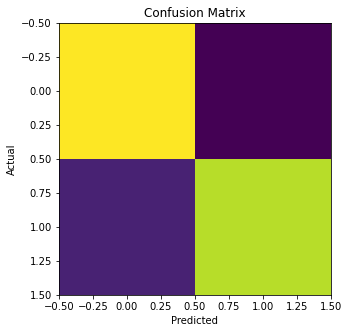

In [38]:
# Visualize Confusion Matrix using Matplotlib
plt.figure(figsize=(5,5))
plt.imshow(cm)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [39]:
# Split the data into Training data & Testing Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = 2)

In [40]:
# Model Training
# Logistic Regression
model = LogisticRegression()

In [41]:
model.fit(X_test, y_test)

LogisticRegression()

In [42]:
# accuracy on training data
print(f"Acc: {round(model.score(X_test, y_test)*100,2)}%")

Acc: 92.39%


In [43]:
# Accuracy on Training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
print(f"Traing Data Accuracy: {round(training_data_accuracy*100,2)}%")


Traing Data Accuracy: 92.63%


In [44]:
# validate the  model on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)
print(f"Test Data  Acc: {round(test_data_accuracy*100,2)}%")

Test Data  Acc: 92.39%
